In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.rc("font", size=14)

In [27]:
data=pd.read_csv('bank.csv',header=0)
data=data.dropna() #Удаление пропущенных данных
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [28]:
a=1000*(3-1) #N – номер студента по журналу
data=data.iloc[a:a+10000,:]

In [29]:
data['education']=np.where(data['education'] =='basic.9y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y',
'Basic', data['education'])

In [30]:
print(list(data.columns))
data.groupby('y').mean()


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.881234,222.133401,2.599460,984.584600,0.133851,0.244152,93.602702,-40.592863,3.804459,5175.907250
1,40.727842,546.034915,1.963295,785.615936,0.526410,-1.286392,93.360432,-39.764816,2.056156,5090.940913


In [31]:
data.drop(data.columns[[0,  16, 17]], axis = 1, inplace = True)
print(data.shape) 

(10000, 18)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


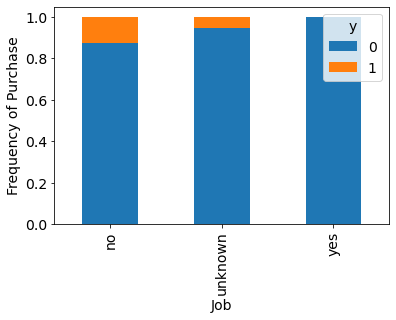

In [32]:
table=pd.crosstab(data.default,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))
data.drop(data.columns[[1, 4, 5, 6]], axis = 1, inplace = True)

In [33]:
print(list(data.columns))
print(data.shape) 

['job', 'education', 'default', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']
(10000, 14)


In [34]:
data = pd.get_dummies(data, columns = ['job', 'education', 'default', 'month', 'day_of_week',    'poutcome'])

In [35]:
print(list(data.columns))


['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [36]:
print(list(data.columns[[19, 25, 27, 46]]))

['job_unknown', 'education_unknown', 'default_unknown', 'poutcome_success']


In [37]:
data.drop(data.columns[[0, 19, 25, 27]], axis = 1, inplace = True)
print(list(data.columns))

['campaign', 'pdays', 'previous', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [38]:
X = data.loc[:,data.columns!='y']
Y = data.loc[:,data.columns=='y']
Y=Y['y']


In [39]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
random_state=0)
print(X_train.shape) 
print(X_test.shape)
print(Y_train.shape) 
print(Y_test.shape)

(7500, 42)
(2500, 42)
(7500,)
(2500,)


In [41]:
logreg = LogisticRegression(solver='lbfgs',random_state=0)
logreg.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [42]:
predicted_y = logreg.predict(X_test)
predicted_y
print('Accuracy: {:.4f}'.format(logreg.score(X_test, Y_test)))

Accuracy: 0.9016


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predicted_y)

array([[2193,   43],
       [ 203,   61]], dtype=int64)

In [44]:
from sklearn.linear_model import LogisticRegressionCV
logreg1 = LogisticRegressionCV(penalty='l2', Cs=10, random_state=0,
n_jobs=-1, max_iter=1000)
logreg1.fit(X_train,Y_train)
predicted_y = logreg1.predict(X_test)
predicted_y
print('Accuracy: {:.4f}'.format(logreg1.score(X_test, Y_test)))
confusion_matrix(Y_test, predicted_y)

Accuracy: 0.9016


array([[2193,   43],
       [ 203,   61]], dtype=int64)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())
print(list(data.columns))

In [ ]:
from sklearn.svm import SVC
svc =SVC(kernel ="linear", random_state =0)
model = svc.fit(X_train,Y_train)
predicted_y = model.predict(X_test)



In [ ]:
print('Accuracy: {:.4f}'.format(model.score(X_test, Y_test)))
      

In [ ]:
confusion_matrix(Y_test, predicted_y)